# Importing the necessary libraries

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Merging all the csv files into one

In [34]:
df =pd.read_csv('Sales_Data/Sales_April_2019.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [35]:
# Listing down number of files in Sales data folder
files=[file for file in os.listdir('./Sales_Data')]

for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [36]:
#Creating the empty data frame
all_months_data=pd.DataFrame()

# Reading all the files
files=[file for file in os.listdir('./Sales_Data')]

# Concanating data from each file to all_months_data
for file in files:
    df=pd.read_csv("./Sales_Data/"+file)
    all_months_data=pd.concat([all_months_data, df])

# Exporting to csv file
all_months_data.to_csv("all_data.csv", index=False)


# Data Cleaning

In [38]:
# Find out the null values in data
nan_df=all_months_data[all_months_data.isna().any(axis=1)]
nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
10012,NaN,NaN,NaN,NaN,NaN,NaN
10274,NaN,NaN,NaN,NaN,NaN,NaN
10878,NaN,NaN,NaN,NaN,NaN,NaN
11384,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# Drop Null values: As all the values in row are null
all_months_data.dropna(inplace= True)

In [40]:
# Drop repeated headers
index_name=all_months_data.loc[all_months_data['Order ID']=='Order ID'].index
index_name

Int64Index([  519,  1149,  1155,  2878,  2893,  3036,  3209,  3618,  4138,
             4645,
            ...
             8644,  9325,  9502,  9615,  9954, 10000, 10387, 11399, 11468,
            11574],
           dtype='int64', length=355)

In [41]:
all_months_data.drop(index_name, inplace= True)

### Converting the data to correct data type for computing

In [46]:
all_months_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182735 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          182735 non-null  object
 1   Product           182735 non-null  object
 2   Quantity Ordered  182735 non-null  object
 3   Price Each        182735 non-null  object
 4   Order Date        182735 non-null  object
 5   Purchase Address  182735 non-null  object
dtypes: object(6)
memory usage: 9.8+ MB


In [47]:
all_months_data['Quantity Ordered']= pd.to_numeric(all_months_data['Quantity Ordered'])
all_months_data['Price Each']= pd.to_numeric(all_months_data['Price Each'])

In [48]:
# Exporting cleaned data into csv files
all_months_data.to_csv("all_data01.csv", index=False)

In [76]:
# Creating new data frame with cleaned data
all_data= pd.read_csv("all_data01.csv")
all_data.shape

(182735, 6)

In [77]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Agument data with additional column

### Task 1: Add additional column with month data

In [78]:
all_data['Month']=all_data['Order Date'].str[0:2]
all_data['Month']=all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Task 2: Add additional column for sales

In [79]:
all_data['Sales']= all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Task 3: Add column for city

In [80]:
#all_data.drop(columns='City')
def getCity(address):
    return address.split(',')[1]
all_data['City']=all_data['Purchase Address'].apply(lambda x: getCity(x))

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


### Task 4: Add column for state as city can have duplicates (Same city name in different states)

In [81]:
#all_data.drop(columns='State')
def getState(address):
    return address.split(',')[2].split(' ')[1]

all_data['State']=all_data['Purchase Address'].apply(lambda x: getState(x))
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA


In [84]:
# Combining state and city column

all_data['City']= all_data['Purchase Address'].apply(lambda x: f"{getCity(x)} ({getState(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),TX
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),MA
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),CA
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),CA
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),CA


## Q1: What is the best month for sales? How much was earned that month?

In [54]:
result=all_data.groupby('Month').sum()
result

,Order ID,Quantity Ordered,Price Each,Sales
Month,,,,
1,1391148846,10670,1.776156e+06,1.786511e+06
2,1832181724,13162,2.145209e+06,2.158127e+06
3,2520234917,16697,2.740393e+06,2.755969e+06
4,3333217539,20226,3.313522e+06,3.336376e+06
5,3289290354,18344,3.084756e+06,3.101881e+06
6,2876409942,14964,2.508863e+06,2.524465e+06
7,3224356195,15781,2.572765e+06,2.587445e+06
8,2840777365,13185,2.178184e+06,2.191698e+06
9,2886380303,12827,2.038020e+06,2.050361e+06


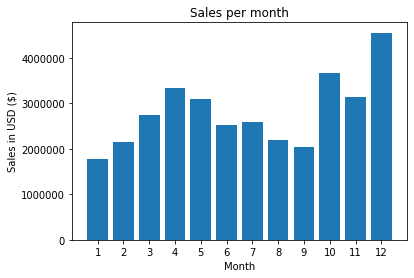

In [55]:
months=range(1, 13)

plt.bar(months, result['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month')
plt.title('Sales per month')
plt.show()

### Q2: What city had the highest number of sales?

In [85]:
result=all_data.groupby('City').sum()
result

,Order ID,Quantity Ordered,Price Each,Month,Sales
City,,,,,
Atlanta (GA),3366679952,16304,2.726247e+06,103160,2.741642e+06
Austin (TX),2238557673,10933,1.777232e+06,68570,1.786746e+06
Boston (MA),4517043947,22123,3.580075e+06,138632,3.604081e+06
Dallas (TX),3360280471,16453,2.702619e+06,102976,2.717794e+06
Los Angeles (CA),6698824762,32722,5.323916e+06,204933,5.354040e+06
New York City (NY),5643048641,27470,4.553287e+06,172980,4.581659e+06
Portland (ME),554542995,2696,4.417017e+05,16889,4.441105e+05
Portland (OR),2269245678,11110,1.822878e+06,69540,1.832539e+06
San Francisco (CA),10127798551,49363,8.074046e+06,310174,8.124121e+06


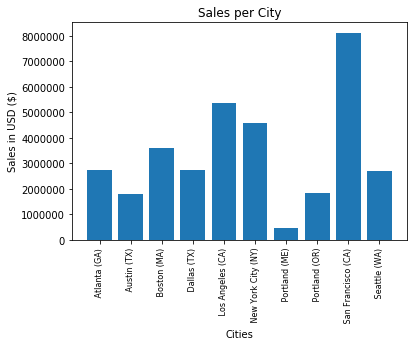

In [92]:
cities=[city for city, df in all_data.groupby('City')]

plt.bar(cities, result['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Cities')
plt.title('Sales per City')
plt.show()

### Question 3: At what time should we display advertisements to likelihood of customer's buying product?

In [101]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),TX
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),MA
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),CA
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),CA
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),CA


In [103]:
# Conveting Order date string into python date time format for easy calculation and formatting
all_data['Order Date']= pd.to_datetime(all_data['Order Date'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),TX
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),MA
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),CA
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),CA
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),CA


In [104]:
all_data['Hour'] =all_data['Order Date'].dt.hour
all_data['Min'] =all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Hour,Min
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),TX,8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),MA,22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),CA,14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),CA,14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),CA,9,27


In [105]:
result=all_data.groupby('Hour').count()
result

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Min
Hour,,,,,,,,,,,
0,3844,3844,3844,3844,3844,3844,3844,3844,3844,3844,3844
1,2313,2313,2313,2313,2313,2313,2313,2313,2313,2313,2313
2,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227
3,816,816,816,816,816,816,816,816,816,816,816
4,843,843,843,843,843,843,843,843,843,843,843
5,1293,1293,1293,1293,1293,1293,1293,1293,1293,1293,1293
6,2445,2445,2445,2445,2445,2445,2445,2445,2445,2445,2445
7,3945,3945,3945,3945,3945,3945,3945,3945,3945,3945,3945
8,6184,6184,6184,6184,6184,6184,6184,6184,6184,6184,6184


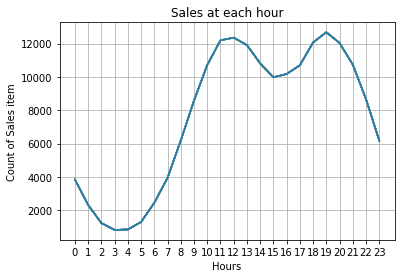

In [110]:
hours=[hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, result)
plt.xticks(hours)
plt.grid()
plt.xlabel("Hours")
plt.ylabel("Count of Sales item")
plt.title("Sales at each hour")
plt.show()

# Recommondation is to display add  around 11am (11) or 7pm (19)

### Q4: What products are most often sold together?

In [111]:
all_data.head()
# Need to see all the duplicate order Id to analyse this problem.

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Hour,Min
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),TX,8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),MA,22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),CA,14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),CA,14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),CA,9,27


In [115]:
# Creating new data frame with duplicated order Id
df =all_data[all_data['Order ID'].duplicated(keep=False)]
df.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Hour,Min
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),CA,14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),CA,14,38
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),CA,19,42
18,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),CA,19,42
29,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),MA,11,31
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),MA,11,31
31,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco (CA),CA,17,0
32,176586,Google Phone,1,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,600.00,San Francisco (CA),CA,17,0
118,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,14.95,New York City (NY),NY,11,7
119,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,11.95,New York City (NY),NY,11,7


In [127]:
df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Hour,Min,Grouped
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),CA,14,38,"Google Phone,Wired Headphones"
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),CA,14,38,"Google Phone,Wired Headphones"
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),CA,19,42,"Google Phone,USB-C Charging Cable"
18,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),CA,19,42,"Google Phone,USB-C Charging Cable"
29,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),MA,11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [129]:
# Removing duplicate Order Id
df=df[['Order ID', 'Grouped']].drop_duplicates()
df.head(100)

,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
2802,179311,"Wired Headphones,USB-C Charging Cable"
2819,179328,"Wired Headphones,AA Batteries (4-pack)"
2832,179340,"Macbook Pro Laptop,Apple Airpods Headphones"
2850,179357,"Google Phone,USB-C Charging Cable"


In [131]:
from itertools import combinations
from collections import Counter

count=Counter()

for row in df['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
print(count)

Counter({('iPhone', 'Lightning Charging Cable'): 973, ('Google Phone', 'USB-C Charging Cable'): 954, ('iPhone', 'Wired Headphones'): 437, ('Google Phone', 'Wired Headphones'): 401, ('Vareebadd Phone', 'USB-C Charging Cable'): 348, ('iPhone', 'Apple Airpods Headphones'): 343, ('Google Phone', 'Bose SoundSport Headphones'): 219, ('USB-C Charging Cable', 'Wired Headphones'): 156, ('Vareebadd Phone', 'Wired Headphones'): 141, ('Lightning Charging Cable', 'Wired Headphones'): 92, ('USB-C Charging Cable', 'Bose SoundSport Headphones'): 76, ('Lightning Charging Cable', 'Apple Airpods Headphones'): 76, ('Vareebadd Phone', 'Bose SoundSport Headphones'): 74, ('Apple Airpods Headphones', 'Wired Headphones'): 69, ('Lightning Charging Cable', 'USB-C Charging Cable'): 58, ('Lightning Charging Cable', 'AA Batteries (4-pack)'): 53, ('Lightning Charging Cable', 'Lightning Charging Cable'): 53, ('Bose SoundSport Headphones', 'Wired Headphones'): 51, ('AA Batteries (4-pack)', 'Lightning Charging Cable'):

In [132]:
# Most common 10 values
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 973),
 (('Google Phone', 'USB-C Charging Cable'), 954),
 (('iPhone', 'Wired Headphones'), 437),
 (('Google Phone', 'Wired Headphones'), 401),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 348),
 (('iPhone', 'Apple Airpods Headphones'), 343),
 (('Google Phone', 'Bose SoundSport Headphones'), 219),
 (('USB-C Charging Cable', 'Wired Headphones'), 156),
 (('Vareebadd Phone', 'Wired Headphones'), 141),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

In [160]:
# Most common 3 items purchased together
for row in df['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list, 3)))
    
for key, value in count.most_common(10):
    print (key, value)

('iPhone', 'Lightning Charging Cable') 1946
('Google Phone', 'USB-C Charging Cable') 1908
('iPhone', 'Wired Headphones') 874
('Google Phone', 'Wired Headphones') 802
('Vareebadd Phone', 'USB-C Charging Cable') 696
('iPhone', 'Apple Airpods Headphones') 686
('Google Phone', 'Bose SoundSport Headphones') 438
('USB-C Charging Cable', 'Wired Headphones') 312
('Vareebadd Phone', 'Wired Headphones') 282
('Lightning Charging Cable', 'Wired Headphones') 184


### Q5: Which product sold most? why do you think that sold most?

In [142]:
product_group=all_data.groupby('Product')
quantity_ordered=product_group.sum()['Quantity Ordered']
product=[product for product, df in product_group]

quantity_ordered

Product
20in Monitor                   4058
27in 4K Gaming Monitor         6134
27in FHD Monitor               7429
34in Ultrawide Monitor         6076
AA Batteries (4-pack)         27148
AAA Batteries (4-pack)        30487
Apple Airpods Headphones      15383
Bose SoundSport Headphones    13236
Flatscreen TV                  4724
Google Phone                   5440
LG Dryer                        640
LG Washing Machine              649
Lightning Charging Cable      22841
Macbook Pro Laptop             4645
ThinkPad Laptop                4054
USB-C Charging Cable          23555
Vareebadd Phone                2023
Wired Headphones              20201
iPhone                         6732
Name: Quantity Ordered, dtype: int64

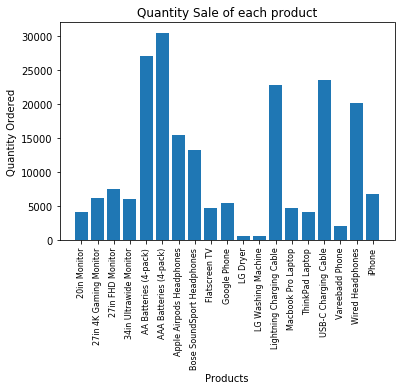

In [146]:
plt.bar(product, quantity_ordered)
plt.xticks(product, rotation=90, size=8)
plt.xlabel("Products")
plt.ylabel("Quantity Ordered")
plt.title("Quantity Sale of each product")
plt.show()

In [149]:
prices= all_data.groupby('Product').mean()['Price Each']
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

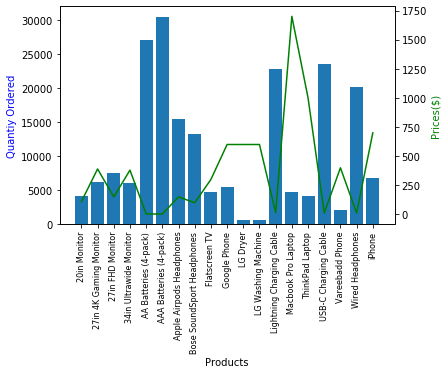

In [159]:
fig, ax1=plt.subplots()

ax2=ax1.twinx()
ax1.bar(product, quantity_ordered)
ax2.plot(product, prices, 'g-')

ax1.set_xlabel("Products")
ax1.set_xticklabels(product, rotation='vertical', size=8)
ax1.set_ylabel('Quantiy Ordered', color='b')
ax2.set_ylabel('Prices($)', color='g')

plt.show()


#### Product with low cost is sold most. 